### <span style="font-family: 'Verdana'; font-size: 35px; font-weight: bold;">Práctica 3: Procesamiento del Lenguaje Natural</span>

__Nombres: Carmen Miguel Spínola, Miguel Ángel Molina de la Rosa__

__Fecha de entrega: 16 de mayo de 2025__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 1234

### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">1) Carga del conjunto de datos</span>


Los ficheros `fake.csv` y `true.csv` contienen artícuos de noticias clasificadas como fake (falsas) o true (reales) respectivamente. Cada noticia tiene como atributos:

*   Title: título de la noticia
*   Text: cuerpo del texto de la noticia
*   Subject: tema de la noticia
*   Date: fecha de publicación de la noticia

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 60% para entrenamiento, 20% para validación y el 20% restante para test. Comprueba que la distribución de los ejemplos en las particiones es similar.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">1.1) Conjunto de datos</span>

Se cargan los conjuntos de datos usando pandas y se muestra un ejemplo aleatorio (usando RANDOM_STATE) de cada uno de ellos.

In [2]:
import pandas as pd

# Carga de los conjuntos de datos
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

In [3]:
# Se muestran un ejemplo de cada dataset
pd.set_option('display.max_colwidth', None) # Para que salga todo el contenido

# Ejemplos aleatorios usando random_state
ejemplo_fake = df_fake.sample(1,random_state=RANDOM_STATE)[['title', 'text', 'subject', 'date']]
ejemplo_true = df_true.sample(1,random_state=RANDOM_STATE)[['title', 'text', 'subject','date']]

# Muestra los ejemplos
display(ejemplo_fake)
display(ejemplo_true)


,title,text,subject,date
2102,Jake Tapper Burns Trump With Bill Maher: He Is ‘Empirically Indecent’ (VIDEO),"A lot about America has changed since the rise of Donald Trump. People thought that his coarse language, his clear racism and misogyny, and just generally appalling behavior would render him unacceptable to the American public. Yet, here we are. Donald Trump is president, and his young administration has fundamentally changed how the world views America, its citizens, and its government. One thing that hasn t changed though is the way some strident and brave media personalities continue to speak truth to power and insist on making sure that Trump s disgusting ways, his incompetence, and his lies don t fundamentally change who we are as a people. Perhaps the breakout star in that regard is CNN s Jake Tapper.Tapper hosts The Lead during the week, and State of the Union on Sunday mornings. On Friday night, the fiery host stopped by HBO s Real Time to have a chat with host Bill Maher. Of course, Maher had to ask about the changes Tapper has had to make now that there s the biggest liar on earth occupying the Oval Office. Tapper responded: You ve been covering politicians for a long time. Politicians lie. It wasn t invented on Jan. 20. I ve never seen this level of falsehood, quantitatively. Tapper went on to distinguish between what happens with say, falsehoods that happened with the Obama Administration such as, If you like your doctor, you can keep your doctor. He says of the lies coming out of the Trump White House: It s conspiracy theories based on nothing that have members of his own party distancing themselves from him. Then the conversation turns to Trump s vulgarity and other fundamental affronts to basic human decency in public discourse. Tapper says of the way Trump behaved on the campaign trail and how he continues to behave: The truth of the matter is that there is no bias when it comes to facts and there s no bias when it comes to decency. It s empirically indecent to make fun of the disabled. That s just indecent. My children know better than that. The two hosts then went on to reference what we all know which is that most of the fundamental things that make Trump so awful, we all learn not to do in grade school. Maher says:I always think about that book Everything I Needed to Know I learned in Kindergarten. He violates every rule. Don t lie, don t accuse people of things they re not guilty of. Don t boast. Pay your taxes. Serve your country. Don t be a racist, don t insult like you say the handicapped people or other people who are not as lucky to be as great looking as you are, Donald. And yet, in spite of all of these things, people still voted for this fundamentally indecent, sorry excuse for a human being. That says things about this nation that we really need to examine, should we survive this nightmare of a presidency. Watch the video below:Featured image via Scott Eisen/Getty Images",News,"March 18, 2017"


,title,text,subject,date
9845,"Regional crises, not human rights, to dominate Obama-Gulf talks","RIYADH (Reuters) - U.S. President Barack Obama aired his human rights concerns with Saudi Arabia’s King Salman on Wednesday, but his talking points on that subject are expected to be get less attention when he meets Gulf Arab monarchs on Thursday. Activists have urged the American leader to push Saudi Arabia over its human rights record, but the region’s many geopolitical crises are likely to dominate a summit already overshadowed by strained ties between Washington and the Gulf. The president, who arrived on Wednesday, hopes to allay Gulf countries’ fears over Iranian influence and encourage them to try to douse sectarian tensions in the region in an effort to confront the threat posed by Islamic State. Most of the Gulf Arab monarchies have in private been sorely disappointed by Obama’s presidency, regarding it as a period in which the United States has pulled back from the region, leaving space for their archrival Iran to expand its influence. Human rights have not figured high on the list of issues straining the relationship. But Saudi Arabia has increasingly chafed at what it sees as a campaign of vilification by Western media, think tanks and rights groups. Rob Malley, Obama’s adviser on the Middle East, said rights issues would be raised, and deputy national security adviser Ben Rhodes met human rights advocates at the White House just before the Riyadh visit to hear their concerns. During a two-hour meeting on Wednesday with the Saudi king and a group of top princes, Obama expressed his broad concerns about human rights issues, the White House said, without listing specific cases. But early signs were that disagreements over human rights would be relegated to the margins of Thursday’s talks. Obama has spoken of his desire to persuade Gulf states to arrive at a “cold peace” with Iran to ease sectarian tensions and allow all sides to focus on what he sees as a greater threat emanating from Islamic State. On Thursday, he will attend a summit of the Gulf Cooperation Council, which groups the monarchical states of Saudi Arabia, Kuwait, Qatar, Bahrain, the United Arab Emirates and Oman. Apart from Oman, they are ruled by Sunni Muslim dynasties that see revolutionary, Shi’ite Iran as a threat to their security and say its involvement in Iraq, Syria, Lebanon and Yemen has fueled conflict and deepened sectarian divisions. The White House shares the view of Gulf Arab states that Tehran plays a destabilizing role. But its willingness to enter a nuclear deal between Iran and world powers last year caused fears in Riyadh that Washington was not listening to Gulf Arab concerns. Riyadh has come under fire in Western countries for its restrictions on women, suppression of freedom of expression, strict blasphemy rules and a judicial system that applies Islamic law and frequently beheads convicts. Rights groups are also pushing for Obama to press Saudi Arabia to end the war in Yemen, for which peace talks are due to take place in Kuwait this week, and where air strikes by a Saudi-led coalition have killed many civilians. “I urge you to take this final opportunity to speak out publicly on human rights issues inside the (Saudi) Kingdom,” Elisa Massimino, president of Human Rights First, a U.S. monitoring and activist group, wrote in an open letter. Saudi Arabia has said other countries should not interfere in its domestic affairs by criticizing its human rights record. It insists its Islamic legal system is its own business and that its courts are fair and independent. It says the war in Yemen was in support of its internationally recognized government and aimed at restoring stability. It says it has taken great care to avoid civilian casualties.",politicsNews,"April 20, 2016"


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">1.2) Estudio de los conjuntos de datos</span>

Primero, se descargan los paquetes necesarios de nltk para poder hacer el estudio de los datos.


In [4]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
wpt = nltk.WordPunctTokenizer()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')      
nltk.download('omw-1.4')      

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\carme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\carme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**NORMALIZACIÓN DEL CORPUS**

Se ha optado por normalizar el corpus, es decir, tratar el contenido de las noticias (columna `text`) para que sea más manejable y cómodo para el análisis pedido.
En esta normalización se recoge el texto para convertirlo a minúsculas para unificar todo, se divide el contenido en palabras individuales(`tokens`) y se elimina la puntuación y las palabras cómunes sin interés semántico para el análsis (`stopwords`). Además, como el significado de las palabras resulta tan importante, se ha lematizado: reducir las palabras a su raíz.

Por último, el texto ya procesado se agrupa en el corpus de noticias verdaderas o falsas (para ello se usa una columna nueva en el dataframe que luego se agrupa como corpus) según procedencia.

In [5]:
import numpy as np
def normalizar(text):
    
    text = text.lower()# Convertir a minúsculas
    tokens = nltk.word_tokenize(text) # Tokenizar
    
    # Eliminar puntuación y stopwords
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lematizar
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Unir todo
    return ' '.join(tokens)


In [6]:
df_true['text_normalized'] = df_true['text'].astype(str).apply(normalizar)
df_fake['text_normalized'] = df_fake['text'].astype(str).apply(normalizar)

# Corpus separados con los textos normalizados
corpus_true = ' '.join(df_true['text_normalized'].tolist())
corpus_fake = ' '.join(df_fake['text_normalized'].tolist())

**¿Por qué tiene sentido normalizar?**

Normalizar resulta muy útil para hacer un análisis acertado del texto y de lo que se desea transmitir:

- Elimina palabras que no resultan relevantes (puntuación, números, stopwors...).
- Unifica el texto y hace que palabras con un significado muy similar sean tratadas como iguales (lematización).
- Reduce significativamente un corpus tan amplio como el que se tiene haciendo por mejorar la eficiencia. Sin la normalización, habría conjuntos de datos que resultarían inabarcables.

El objetivo final es facilitar el análsis que se hará posteriormente, haciendo que los modelos de PLN identifiquen relaciones entre palabras más fácilmente.

**BÚSQUEDA DE PALABRAS MÁS COMÚNES**

Usando los corpus normalizados, se usa la librería Counter para obtener la frecuencia de aparición de las palabras/tokens en estos. Una vez calculado esto, se obtienen las 20 palabras que más aparecen tanto en las noticias falsas como en las verdaderas.

Para sintetizar, se han calculado también las palabras más comúnes teniendo en cuenta ambos corpus usando las frecuencias calculadas anteriormente en cada uno de ellos.

In [7]:
from collections import Counter
# Se obtienen las palabras que aparecen en noticias verdaderas con su frecuencia
tokens_true = corpus_true.split() 
frecuencia_true = Counter(tokens_true)

# Se muestran las 20 más frecuentes en una tabla (df)
mas_comunes_true = frecuencia_true.most_common(20)
df_mas_comunes_true = pd.DataFrame(mas_comunes_true, columns=['Palabra', 'Frecuencia'])
print(df_mas_comunes_true)

       Palabra  Frecuencia
0         said       99037
1        trump       54280
2        state       36243
3        would       31526
4      reuters       28412
5    president       26939
6   republican       22098
7   government       19433
8         year       18721
9        house       16906
10         new       16784
11        also       15946
12      united       15576
13      people       15207
14       party       14964
15    official       14575
16        told       14244
17     country       13948
18    election       13910
19       could       13709


In [8]:
# Se obtienen las palabras que aparecen en noticias falsas con su frecuencia
tokens_fake = corpus_fake.split()
frecuencia_fake = Counter(tokens_fake)

# Se muestran las 20 más frecuentes
mas_comunes_fake = frecuencia_fake.most_common(20)
df_mas_comunes_fake = pd.DataFrame(mas_comunes_fake, columns=['Palabra', 'Frecuencia'])
print(df_mas_comunes_fake)

       Palabra  Frecuencia
0        trump       74403
1         said       31149
2    president       26340
3       people       26098
4          one       23812
5        would       23461
6        state       22072
7      clinton       18717
8         like       18207
9        obama       17920
10        time       17885
11      donald       17235
12    american       16093
13  republican       16061
14         say       15528
15        also       15243
16        year       14843
17         new       14198
18        news       14198
19           u       14172


In [9]:
# Combinar las frecuencias de ambos corpus
frecuencia_total = frecuencia_true + frecuencia_fake

# Obtener las 20 palabras más comunes en total
mas_comunes_total = frecuencia_total.most_common(20)

df_mas_comunes_total = pd.DataFrame(mas_comunes_total, columns=['Palabra', 'Frecuencia'])
print(df_mas_comunes_total)

       Palabra  Frecuencia
0         said      130186
1        trump      128683
2        state       58315
3        would       54987
4    president       53279
5       people       41305
6   republican       38159
7          one       36837
8         year       33564
9         also       31189
10         new       30982
11     reuters       28799
12  government       28512
13     clinton       28221
14      donald       27682
15       house       27680
16       obama       27117
17        time       26933
18         say       25462
19     country       24718


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">1.3) Partición de datos</span>

Se realiza la partición de datos tal y como se pide:
- Se divide el conjunto en 60% para entrenamiento y 40% un conjunto temporal con `train_test_split`.
- Para obtener el 20% para validación y el 20% para test se divide el 40% que se tiene en el conjunto temporal en dos partes iguales.

Se ha usado el parámetro `stratify` con el contenido de las etiquetas de true o fake para mantener la proporción entre los dos tipos de noticias en las particiones.

In [10]:
from sklearn.model_selection import train_test_split

# Se combinan los datos de noticias verdaderas y falsas y se crean etiquetas de diferenciación
df_true['label'] = 1  
df_fake['label'] = 0  
df_total = pd.concat([df_true, df_fake], ignore_index=True)

X = df_total['text_normalized']  # Texto normalizado
y = df_total['label']            # Etiquetas

# Dividir en conjunto de entrenamiento (60%) y conjunto temporal (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y)

# Dividir el conjunto temporal en validación (20%) y test (20%), a la mitad
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=y_temp)

# Tamaños
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")
print(f"Tamaño del conjunto de test: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 26938
Tamaño del conjunto de validación: 8980
Tamaño del conjunto de test: 8980


### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">2) Representación como bolsa de palabras</span>


Elige justificadamente una representación de bolsa de palabras y aplícala.
Muestra un ejemplo antes y después de aplicar la representación. Explica los cambios.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">2.1) Elección de la representación</span>

Se elige la representación TF-IDF ya que no solo cuenta cuántas veces aparece una palabra, sino que además penaliza las palabras comúnes y resalta las más informativas, lo que es un aspecto deseable al tener un conjunto de datos tan extenso.

Esto es especialmente útil para tareas como clasificación de textos que en ultima instancia es algo que se pretende al tener noticias diferenciadas en verdaderas o falsas.

Como se puede observar se ha limitado el vocabulario a las 5000 palabras más frecuentes en el corpus de entrenamiento que se obtuvo. Esto se ha hecho para evitar generar vectores demasiado grandes o dispersos al haber palabras que aparezcan muy pocas veces en relación a todo el corpus. Además, el modelo TF-IDF ya les daría poco peso aunque no se quiten.

El objetivo es recoger las palabras más útiles e informativas del corpus y se puede ajustar el número según se hagan pruebas posteriormente.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Se vectoriza solo con los textos de entrenamiento
tv = TfidfVectorizer(max_features=5000)
X_train_tfidf = tv.fit_transform(X_train).toarray()
X_val_tfidf = tv.transform(X_val).toarray()
X_test_tfidf = tv.transform(X_test).toarray()

vocab = tv.get_feature_names_out()

# Se muestra parte del dataframe con los datos de entrenamiento
df_train_tfidf = pd.DataFrame(np.round(X_train_tfidf, 2), columns=vocab)
df_train_tfidf.head()  


,abadi,abandon,abandoned,abbas,abc,abdullah,abe,abedin,ability,able,...,youth,youtube,ypg,zealand,zero,zika,zimbabwe,zinke,zone,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se imprime solo una pequeña parte de toda la matriz, esta resulta ser demasiado grande si tenemos en cuenta que debe tener una columna por cada palabra (5000 como se limitó) y una fila por cada texto (26938 que era el tamaño del conjunto de entrenamiento).

Para tener una idea de la forma de la matriz, se añade un resumen de algunos puntos importantes de cómo ha quedado la representación:

In [12]:
# Forma de la matriz TF-IDF
print(f"Forma de la matriz TF-IDF: {df_train_tfidf.shape}")

# Palabras más frecuentes según media TF-IDF
frecuencia_media = df_train_tfidf.mean().sort_values(ascending=False)
print("\nPalabras con mayor peso medio TF-IDF:")
print(frecuencia_media.head(20))


Forma de la matriz TF-IDF: (26938, 5000)

Palabras con mayor peso medio TF-IDF:
trump         0.060451
said          0.045951
state         0.025768
president     0.025434
would         0.022962
republican    0.022396
clinton       0.020366
people        0.020169
obama         0.018358
house         0.017637
reuters       0.017290
one           0.016729
donald        0.016254
year          0.015841
new           0.015721
government    0.015586
party         0.015346
white         0.015296
election      0.014833
united        0.014223
dtype: float64


Tal y como se adelantaba se tienen 26938 filas y 5000 columnas según el tamaño del conjunto de entrenamiento y el conjunto del vocabulario limitado escogido.

Se muestran las 20 palabras a las que el modelo ha otorgado mayor peso y se puede hacer una pequeña comparativa entre estas y las más comúnes anteriormente calculadas aunque hay que tener en cuenta que el modelo TF-IDF se hace sobre el conjunto de entrenamiento que es un subconjunto del corpus total del que se obtenían las palabras más comúnes.

Aunque hay algunas que se repiten en ambos cálculos (como `trump`o `state`) hay otras que no son tan frecuentes en el corpus de manera global pero aparecen en documentos concretos de manera específica (`party` o `white`). De igual manera, hay palabras muy comúnes que tienen poco peso al ser poco distintivas (`country` o `also`).

Por último, se ha generado una pequeña representación de la matriz calculada por el modelo TF-IDF en forma de nube de palabras donde destacan aquellas con mayor peso al construir la representación con el peso promedio de cada palabra a lo largo del conjunto de entrenamiento.

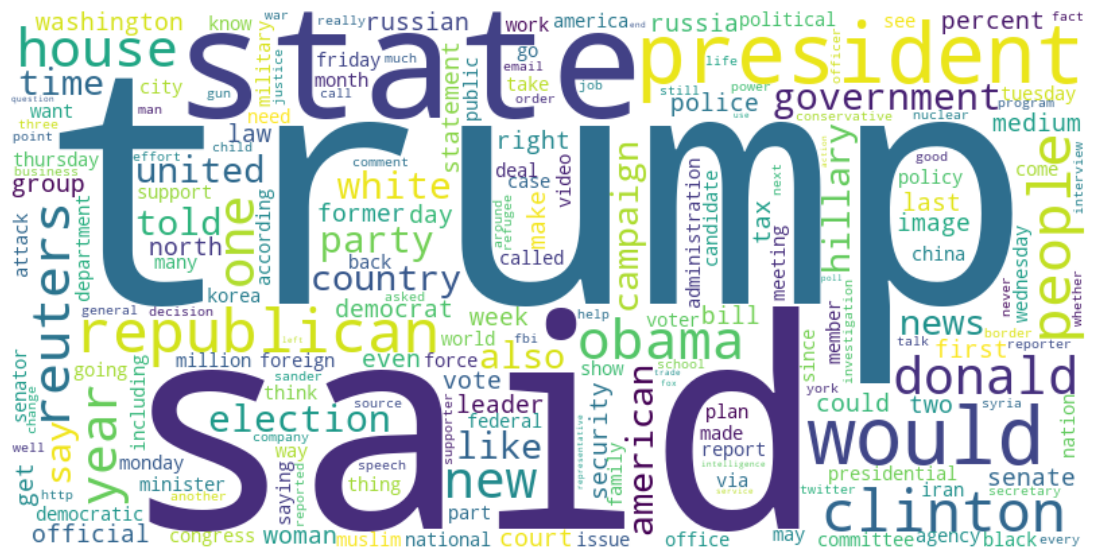

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Se crea un diccionario por cada palabra y su peso medio
frecuencias = df_train_tfidf.mean().to_dict()

# Se crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencias)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">2.2) Ejemplos</span>

Se muestra un ejemplo antes de aplicar el modelo y después:

In [ ]:
# Ejemplo antes
print("Ejemplo antes:\n")
original = X_train.iloc[0]  # texto original normalizado
print(original)

num_palabras_original = len(original.split())
print(f"Número de palabras: {num_palabras_original}")

print("\nEjemplo después:\n")
vocab = tv.get_feature_names_out()
df_tfidf_example = pd.DataFrame([np.round(X_train_tfidf[0], 2)], columns=vocab)

display(df_tfidf_example.loc[:, (df_tfidf_example != 0).any(axis=0)])  # columnas no nulas

Observando el ejemplo se tiene que:

- Antes de aplicar el modelo se muestra un texto normalizado, el contenido de la noticia sin stopwords o puntuación. Es simplemente el texto original sin ninguna representación matemática por lo que muchas palabras pueden ser aún poco relevantes.

- Al aplicar el modelo, se obtienen las palabras que aparecen en el texto normalizado como columnas de una sola fila (el propio texto) como parte de la matriz de todo el corpus. En este caso, se ha optado por eliminar aquellas palabras que tenían un peso nulo para así solo visualizar las columnas con peso mayor que cero otorgado por el modelo (son en total 136 de las 227 que había antes de aplicar el modelo). Las palabras más comunes del texto anteriormente pueden no aparecen con un valor destacado, ya que TF-IDF penaliza a las palabras más comunes al asignarles un peso más bajo. 

En conclusión, aplicar TF-IDF asigna pesos a las palabras que son más significativas para el análisis, eliminando las que son demasiado comúnes ofreciendo una representación matemática útil para el análisis.

### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">3) Aplica 3 algoritmos de aprendizaje automático para resolver la tarea</span>
Justifica porqué los has elegido.
Ajusta los modelos respecto a un hiperparámetro que consideres oportuno. Justifica tu elección.
Explica los resultados obtenidos.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">3.1) Árboles de decisión</span>

**JUSTIFICACIÓN**

Se usa un árbol de decisión porque resulta fácil de entender y puede funcionar bien como primera aproximación. Este modelo divide los datos en función de las características que mejor separan las clases (palabras del texto). Como se tiene un gran conjunto de datos, un árbol de decisión puede ser una opción válida para explorar la importancia de las diferentes palabras en la clasificación.

**HIPERPARÁMETROS**

Se ajustaron tres hiperparámetros clave utilizando `HalvingGridSearchCV`:
- `max_depth`[10, 20]: Limita la profundidad del árbol para evitar sobreajuste. Un valor más alto permite más expresividad, pero aumenta el riesgo de overfitting.
- `min_samples_split`[10, 20]: Controla cuántas muestras necesita un nodo para dividirse. Valores más altos evitan divisiones irrelevantes.
- `min_samples_leaf`[5, 10]: Establece el mínimo de muestras por hoja. 

In [ ]:
import numpy as np 
from sklearn.experimental import enable_halving_search_cv # habilita Halving
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Árbol de decisión 
dt_model = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Rejilla de parámetros 
param_grid_dt_simplified = {
    'max_depth':[10, 20],     
    'min_samples_split':[10, 20],         
    'min_samples_leaf': [5, 10]           
}

print(f"Número de combinaciones a probar inicialmente: {len(param_grid_dt_simplified['max_depth']) * len(param_grid_dt_simplified['min_samples_split']) * len(param_grid_dt_simplified['min_samples_leaf'])}")

# HalvingGridSearchCV con paralelizacion y rejilla 
halving_search_dt_faster = HalvingGridSearchCV(
    dt_model,
    param_grid_dt_simplified, # Usamos la rejilla
    cv=3,
    factor=2,                 
    scoring='accuracy',
    n_jobs=-1,                 
    random_state=RANDOM_STATE,
    verbose=1                  # Añadido: Muestra progreso durante la ejecución
)

print("Iniciando HalvingGridSearchCV con paralelización...")
halving_search_dt_faster.fit(X_train_tfidf, y_train) # Usa los datos originales

print("\n--- Resultados con Optimización (Paralelización + Rejilla Simplificada) ---")
print("Mejores parámetros encontrados:", halving_search_dt_faster.best_params_)

# Evaluar en el conjunto de validación
y_pred_dt_faster = halving_search_dt_faster.best_estimator_.predict(X_val_tfidf)
print("\nReporte de Clasificación en Validación:")
print(classification_report(y_val, y_pred_dt_faster))

print(f"\nMejor puntuación de cross-validation (accuracy): {halving_search_dt_faster.best_score_:.4f}")

Número de combinaciones a probar inicialmente: 8
Iniciando HalvingGridSearchCV con paralelización...
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 3367
max_resources_: 26938
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 8
n_resources: 3367
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 1
n_candidates: 4
n_resources: 6734
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 2
n_candidates: 2
n_resources: 13468
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 3
n_candidates: 1
n_resources: 26936
Fitting 3 folds for each of 1 candidates, totalling 3 fits

--- Resultados con Optimización (Paralelización + Rejilla Simplificada) ---
Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 20}

Reporte de Clasificación en Validación:
              precision    recall  f1-score   support

           0       1.00   

**RESULTADOS**
- Mejores hiperparámetros encontrados:
    - `max_depth`: 20
    - `min_samples_leaf`: 10
    - `min_samples_split`: 20

Se crea un árbol profundo de hasta 20 niveles pero se dan restricciones en el número mínimo de miestras por nodod para evitar sobreajuste (10 hojas mínimo y 20 para dividir).

- Accuracy global del 99%, que indica que el modelo acierta prácticamente siempre en la clasificación de los textos. 
- Precisión y recalll altos que refuerzan la idea de que el modelo no suele equivocarse.

- Rendimiento en cross-validation de 0.9945. Indica que, además de en validación, el modelo es bueno generalizando en diferentes particiones del conjunto de entrenamiento (no parece haber sobreajuste).

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">3.2) K-Nearest Neighbors (KNN)</span>

**JUSTIFICACIÓN**

Este algoritmo es especialmente útil cuando las clases no están claramente separadas por un margen, como puede ocurrir en algunos conjuntos de texto y se puede probar a ver si clasfica bien las noticias en verdaderas o falsas. 

Por otro lado, el algoritmo puede ser muy costoso si el conjunto de datos es demasiado grande.

**HIPERPARÁMETROS**

- `n_neighbors` [3, 5, 7, 10]: cuántos vecinos cercanos se consideran para clasificar un nuevo punto.
- `metric`[euclídea o manhattan]: cómo se mide la distancia entre dos puntos. Euclídea (distancia en línea recta) o Manhattan (suma de diferencias absolutas).
- `algorithm` (ball_tree): algoritmo utilizado cuando el número de dimensiones es moderado (en este caso era 300 tras reduccir la dimensión con svd).

In [ ]:
import numpy as np 
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time # Para medir el tiempo


print("Preparando datos con TruncatedSVD...")
# Reducir dimensión con LSA (TruncatedSVD)
svd = TruncatedSVD(n_components=300, random_state=RANDOM_STATE)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_val_svd   = svd.transform(X_val_tfidf)
print(f"Dimensiones de entrenamiento tras SVD: {X_train_svd.shape}")
print(f"Dimensiones de validación tras SVD: {X_val_svd.shape}")


# Definir modelo KNN 'ball_tree' para dimensiones moderadas/altas
knn_model_opt = KNeighborsClassifier(algorithm='ball_tree') 

# Rejilla de parámetros 
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'metric': ['euclidean', 'manhattan']
}
print(f"Rejilla de parámetros KNN: {param_grid_knn}")


grid_search_knn_opt = GridSearchCV(
    knn_model_opt,           # Usamos el modelo con algoritmo especificado
    param_grid_knn,
    cv=3,
    n_jobs=-1,              
    scoring='accuracy',
    verbose=1                # Muestra progreso
)

print("\nIniciando GridSearchCV para KNN (backend por defecto)...")
start_time = time.time()

grid_search_knn_opt.fit(X_train_svd, y_train)

end_time = time.time()
print(f"\nGridSearchCV para KNN completado en {end_time - start_time:.2f} segundos.")

# Evaluación 
print(f"\nMejores parámetros para KNN: {grid_search_knn_opt.best_params_}")
print(f"Mejor puntuación de cross-validation (accuracy): {grid_search_knn_opt.best_score_:.4f}")

y_pred_knn_opt = grid_search_knn_opt.best_estimator_.predict(X_val_svd)
print("\nResultados de KNN en Validación:")
print(classification_report(y_val, y_pred_knn_opt))

Preparando datos con TruncatedSVD...
Dimensiones de entrenamiento tras SVD: (26938, 300)
Dimensiones de validación tras SVD: (8980, 300)
Rejilla de parámetros KNN: {'n_neighbors': [3, 5, 7, 10], 'metric': ['euclidean', 'manhattan']}

Iniciando GridSearchCV para KNN (backend por defecto)...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



GridSearchCV para KNN completado en 952.54 segundos.

Mejores parámetros para KNN: {'metric': 'euclidean', 'n_neighbors': 3}
Mejor puntuación de cross-validation (accuracy): 0.9002

Resultados de KNN en Validación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4697
           1       0.93      0.87      0.90      4283

    accuracy                           0.91      8980
   macro avg       0.91      0.90      0.90      8980
weighted avg       0.91      0.91      0.90      8980



**RESULTADOS**

- Mejores hiperparámetros encontrados:
    - `n_neighbors`: 3, puede deberse hay que hay patrones locales fuertes que ayudan al modelo a clasificar bien.
    - `metric`: euclidean, parece comportarse mejor con  esta métrica.

- En general, la precisión en la clasificación de ambas clases es alta (0.89 y 0.94) y hay un equilibrio entre la precisión y el recall de ambas clases.

- Por otro lado, a pesar de que el modelo clasifica razonablemente bien y tiene una precisión total sólida, es cierto que en el árbol de decisión la precisión total era aún mayor al 91% de este modelo.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">3.3) Naive Bayes</span>

**JUSTIFICACIÓN**

El algoritmo es muy eficiente y adecuado cuando se tiene un conjunto de datos grande y se busca un modelo rápido y sencillo. En el caso de textos, MultinomialNB es el más utilizado y, por ende, el que se va a utilizar.

**HIPERPARÁMETROS**

- `alpha` [0.1, 0.5, 1, 2] (coeficiente de suavizado de Laplace):  sirve para evitar probabilidades de cero cuando una palabra no aparece en los datos de entrenamiento. Valores más altos suavizan más (restar peso a palabras muy informativas) y valores más pequeños permiten que las probabilidades se acerquen más a los datos originales.

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time # Para medir el tiempo

nb_model = MultinomialNB()

#Rejilla de parámetros
param_grid_nb = {
    'alpha': [0.1, 0.5, 1, 2] # Parámetro de suavizado de Laplace
}
print(f"Rejilla de parámetros Naive Bayes: {param_grid_nb}")

grid_search_nb = GridSearchCV(
    nb_model,
    param_grid_nb,
    cv=3,
    n_jobs=2,        
    scoring='accuracy',
    verbose=1          # Muestra progreso
)

print("\nIniciando GridSearchCV para Naive Bayes...")
start_time = time.time()

# Entrenar usando los datos TF-IDF originales
grid_search_nb.fit(X_train_tfidf, y_train) 

end_time = time.time()
print(f"\nGridSearchCV para Naive Bayes completado en {end_time - start_time:.2f} segundos.")

# Evaluación 
print(f"Mejores parámetros para Naive Bayes: {grid_search_nb.best_params_}")
print(f"Mejor puntuación de cross-validation (accuracy): {grid_search_nb.best_score_:.4f}")

y_pred_nb = grid_search_nb.best_estimator_.predict(X_val_tfidf)
print("\nResultados de Naive Bayes en Validación:")
print(classification_report(y_val, y_pred_nb))

Rejilla de parámetros Naive Bayes: {'alpha': [0.1, 0.5, 1, 2]}

Iniciando GridSearchCV para Naive Bayes...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

GridSearchCV para Naive Bayes completado en 36.03 segundos.
Mejores parámetros para Naive Bayes: {'alpha': 0.1}
Mejor puntuación de cross-validation (accuracy): 0.9287

Resultados de Naive Bayes en Validación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4697
           1       0.93      0.92      0.92      4283

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



**RESULTADOS**

- Mejores hiperparámtros encontrados:
    -`alpha` = 0.1, lo que sugiere que una suavización mínima produce mejor rendimiento y las probabilidades estén cercanas a los datos originales. También es posible que los datos TF-IDF ya están bien normalizados y contengan pocos ceros.

- Validación cruzada de 0.9287 lo que indica que el modelo generaliza bastante vien durante en entrenamiento con una precisión de casi el 93%.

- El modelo predice la clasificación en ambas clases con un rendimiento muy balanceado del 93%. Además el F1-score es alto lo que muestra un equilibrio entre falsos positivos y negativos.

- También conviene destacar que el entrenamiento fue muy rápido y solo se tardaron 36 segundos.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">3.4) Conclusión</span>

- **Árbol de decisión**: fue el modelo más preciso, alcanzando una accuracy del 99%, gracias a su capacidad de capturar relaciones complejas entre características. Sin embargo, este alto desempeño podría estar rozando el sobreajuste si los datos de validación no son muy distintos de entrenamiento.

- **KNN**: fue también efectivo (91%) pero resultó ser el modelo más costoso computacionalmente. A pesar de aplicar reducción de dimensión con SVD, su entrenamiento fue largo y su rendimiento no mejoró en comparación. KNN no funciona bien con conjuntos grandes o de alta dimensión.

- **Naive Bayes**: siendo  más simple, mostró un rendimiento alto (93%) con tiempo de entrenamiento mínimo. Es especialmente eficaz para texto con TF-IDF, donde la independencia entre características es razonable. 

### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">4) Construye redes neuronales con Keras con distintas maneras de usar word embeddings</span>

Justifica tus decisiones y explica los resultados obtenidos.

_**Modelo con embedding entrenado desde cero**_

Un embedding entrenado desde cero permite aprender representaciones específicas del dominio (noticias falsas y reales). La ventaja es que puede adaptarse específicamente a nuestro conjunto de datos, aunque puede requerir más datos y tiempo para alcanzar buenos resultados

- Embedding con dimensión 64: Un valor moderado para permitir aprendizaje de características semánticas y contextuales sin caer en sobreajuste.

- GlobalAveragePooling1D: Permite condensar información textual en un vector compacto.

- Dos capas Dense adicionales para captar relaciones no lineales.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.1) Configuración e importación de librerías</span>

Importamos las librerías necesarias:
- `pandas` para manipulación de datos.
- `numpy` para operaciones numéricas.
- `re` para expresiones regulares (limpieza de texto).
- `matplotlib.pyplot` para gráficos.
- `sklearn.model_selection` para dividir los datos.
- `tensorflow.keras` para construir y entrenar la red neuronal (Tokenizer, pad_sequences, Sequential, Layers, Optimizers).
- `os` para verificar la existencia del archivo GloVe.

También definimos constantes clave para el preprocesamiento y el modelo:
- `VOCAB_SIZE`: Número máximo de palabras únicas a considerar.
- `MAX_LEN`: Longitud fija a la que se ajustarán todas las secuencias de texto.
- `EMBEDDING_DIM_SCRATCH`: Dimensión de los vectores de palabras si los entrenamos desde cero.
- `EMBEDDING_DIM_GLOVE`: Dimensión de los vectores GloVe que usaremos (¡debe coincidir con el archivo descargado!).
- `EPOCHS`, `BATCH_SIZE`: Parámetros para el entrenamiento.


In [40]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, LSTM, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam
import os

# --- Configuración de Parámetros ---
VOCAB_SIZE = 10000      # Tamaño máximo del vocabulario
MAX_LEN = 256           # Longitud máxima de las secuencias
EMBEDDING_DIM_SCRATCH = 32 # Dimensión para embeddings desde cero
EMBEDDING_DIM_GLOVE = 100 # Dimensión GloVe (ej: 100d) - ¡Ajustar si usas otro archivo!
EPOCHS = 5             # Número de épocas (ajustar según sea necesario)
BATCH_SIZE = 64         # Tamaño del lote

GLOVE_FILE = './glove.6B.100d.txt' 

# Verificar si el archivo GloVe existe para habilitar los métodos 2 y 3
use_glove = os.path.exists(GLOVE_FILE)
if not use_glove:
    print(f"ADVERTENCIA: Archivo GloVe no encontrado en '{GLOVE_FILE}'.")
    print("Los métodos 2 y 3 (Embeddings Pre-entrenados) no se ejecutarán.")
    print("Descarga GloVe (ej: glove.6B.100d.txt), descomprímelo y ajusta la ruta GLOVE_FILE.")

# Variable para almacenar resultados de cada método
results = {}

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.2) Carga de datos</span>

Cargamos los archivos `fake.csv` y `true.csv`. Añadimos una columna `label` (0 para fake, 1 para true) a cada uno antes de combinarlos en un único DataFrame `df`. Mostramos las primeras filas para verificar.

In [41]:
print("Cargando datos...")
try:
    df_fake = pd.read_csv('fake.csv')
    df_true = pd.read_csv('true.csv')

    df_fake['label'] = 0
    df_true['label'] = 1

    df = pd.concat([df_fake, df_true], ignore_index=True)

    print(f"Datos cargados: {len(df)} noticias.")
    print("Columnas disponibles:", df.columns.tolist())
    print("\nDistribución de etiquetas:")
    print(df['label'].value_counts())
    print("\nPrimeras filas del DataFrame:")
    print(df[['title', 'text', 'subject', 'label']].head())

except FileNotFoundError:
    print("Error Fatal: Asegúrate de que 'fake.csv' y 'true.csv' están en el directorio correcto.")
    df = pd.DataFrame() 

Cargando datos...
Datos cargados: 44898 noticias.
Columnas disponibles: ['title', 'text', 'subject', 'date', 'label']

Distribución de etiquetas:
label
0    23481
1    21417
Name: count, dtype: int64

Primeras filas del DataFrame:
                                                                                        title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                          

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.3) Preparación y limpieza inicial</span>

Combinamos las columnas `title` y `text` en una nueva columna `full_text` para tener una fuente única de texto por noticia. Eliminamos filas donde este texto combinado sea nulo (si las hubiera) y luego mezclamos aleatoriamente el DataFrame para evitar sesgos durante el entrenamiento.

In [42]:
if not df.empty:
    # Combinar título y texto (manejar posibles NaN en título o texto)
    df['full_text'] = df['title'].fillna('') + " " + df['text'].fillna('')

    # Eliminar filas con texto combinado vacío
    df = df.dropna(subset=['full_text'])
    df = df[df['full_text'].str.strip() != ''] # Asegurar que no sean solo espacios

    print(f"\nNoticias después de combinar texto y eliminar vacíos: {len(df)}")

    # Mezclar los datos
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    print("Datos mezclados aleatoriamente.")
    print("\nEjemplo de 'full_text' (primera noticia mezclada):")
    print(df['full_text'].iloc[0][:500] + "...") # Mostrar inicio del texto
else:
    print("DataFrame vacío, saltando preparación y limpieza.")


Noticias después de combinar texto y eliminar vacíos: 44898
Datos mezclados aleatoriamente.

Ejemplo de 'full_text' (primera noticia mezclada):
Ben Stein Calls Out 9th Circuit Court: Committed a ‘Coup d’état’ Against the Constitution 21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements on Judge Jeanine Pirro s show recently. While discussing the halt that was imposed on President Trump s Executive Order on travel. Stein referred to the judgement by the 9th Circuit Court in Washingto...


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.4) Preprocesamiento del texto</span>

Definimos una función `preprocess_text` para limpiar el texto:
- Convierte a minúsculas.
- Elimina caracteres que no sean letras, números o espacios en blanco.
- Normaliza los espacios.

Luego, aplicamos esta función a nuestra columna `full_text` para crear `clean_text`.

In [44]:
def preprocess_text(text):
    """Limpia el texto: minúsculas, elimina URLs, tags, caracteres no deseados."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text) # Eliminar texto entre corchetes
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Eliminar URLs
    text = re.sub(r'<.*?>+', '', text) # Eliminar tags HTML
    text = re.sub(r'[^a-z0-9\s]', '', text) # Conservar solo letras (a-z), números (0-9) y espacios
    text = re.sub(r'\n', ' ', text) # Reemplazar saltos de línea por espacios
    text = re.sub(r'\s+', ' ', text).strip() # Eliminar espacios múltiples/extra
    return text

if not df.empty:
    print("\nAplicando función de preprocesamiento...")
    df['clean_text'] = df['full_text'].apply(preprocess_text)
    print("Texto limpiado (ejemplo de la primera noticia):")
    print(df['clean_text'].iloc[0][:500] + "...")
else:
    print("DataFrame vacío, saltando preprocesamiento.")


Aplicando función de preprocesamiento...
Texto limpiado (ejemplo de la primera noticia):
ben stein calls out 9th circuit court committed a coup dtat against the constitution 21st century wire says ben stein reputable professor from pepperdine university also of some hollywood fame appearing in tv shows and films such as ferris bueller s day off made some provocative statements on judge jeanine pirro s show recently while discussing the halt that was imposed on president trump s executive order on travel stein referred to the judgement by the 9th circuit court in washington state as ...


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.5) Tokenización y secuenciación</span>

Usamos `Tokenizer` de Keras para:
1. Construir un vocabulario con las `VOCAB_SIZE` palabras más frecuentes encontradas en `clean_text`. Asigna un índice entero a cada palabra. Las palabras menos frecuentes o no vistas se marcan con un token especial `<OOV>` (Out Of Vocabulary).
2. Convertir cada texto limpio en una secuencia de índices enteros basada en el vocabulario construido.

In [46]:
if not df.empty:
    # Tokenización
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
    tokenizer.fit_on_texts(df['clean_text'])
    word_index = tokenizer.word_index
    print(f"\nVocabulario construido con {len(word_index)} palabras únicas.")
    print(f"Se usarán las {VOCAB_SIZE} más frecuentes.")

    # Secuenciación
    sequences = tokenizer.texts_to_sequences(df['clean_text'])
    print("\nEjemplo de secuencia (primeros 30 índices de la primera noticia):")
    print(sequences[0][:30])
else:
    print("DataFrame vacío, saltando tokenización.")
    sequences = [] # Inicializar vacío para evitar errores


Vocabulario construido con 226548 palabras únicas.
Se usarán las 10000 más frecuentes.

Ejemplo de secuencia (primeros 30 índices de la primera noticia):
[1774, 3246, 579, 57, 5050, 2423, 131, 1096, 5, 2015, 1, 89, 2, 983, 1004, 768, 968, 147, 1774, 3246, 1, 1489, 26, 1, 495, 63, 4, 83, 1407, 7110]


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.6) Padding</span>

Las redes neuronales requieren entradas de tamaño fijo. Usamos `pad_sequences` para asegurar que todas las secuencias de índices tengan exactamente `MAX_LEN` elementos.
- Las secuencias más largas que `MAX_LEN` se truncan (por defecto, al final: `truncating='post'`).
- Las secuencias más cortas se rellenan con ceros (por defecto, al final: `padding='post'`).

In [47]:
if sequences: # Verificar si hay secuencias para procesar
    print(f"\nAplicando padding a longitud {MAX_LEN}...")
    padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
    print("Forma de las secuencias con padding (noticias, longitud):", padded_sequences.shape)
    print("\nEjemplo de secuencia con padding (primera noticia):")
    print(padded_sequences[0])

    # Extraer etiquetas correspondientes
    labels = df['label'].values
    print("\nForma de las etiquetas:", labels.shape)
else:
    print("No hay secuencias para aplicar padding.")
    padded_sequences = np.array([]) # Inicializar vacío
    labels = np.array([])


Aplicando padding a longitud 256...
Forma de las secuencias con padding (noticias, longitud): (44898, 256)

Ejemplo de secuencia con padding (primera noticia):
[1774 3246  579   57 5050 2423  131 1096    5 2015    1   89    2  983
 1004  768  968  147 1774 3246    1 1489   26    1  495   63    4   83
 1407 7110 4092    7  984  720    6 7182  173   19    1    1   11  202
  220  130   83 5605 1220    9  445 7066 9691   11  239  712  113 2456
    2 2851    8   18 2257    9   38   15   11  372  245    9  767 3246
 2310    3    2    1   21    2 5050 2423  131    7  108   61   19    5
 2015  651    1   89    2  372 3029    6   89    2  983 3246  371    9
    3  308    2 1722    7 3981  125    1    6    2 1741  125    1  320
    2  293  902   10    2 1327 1220    6 1706    2 6204 2906    3    2
 1250    4    2 1545  120    6 6036   30    1    3 1706    8   67  131
   22  417 1823   96  142 1707    7  314    7    2  389   49  985    2
  386    1    4    2 2851   49    2 1817 2873    4    2  3

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.7) División en conjuntos de entrenamiento y prueba</span>

Dividimos las secuencias con padding (`padded_sequences`) y las etiquetas (`labels`) en dos conjuntos:
- **Entrenamiento (Train):** Se usa para entrenar el modelo (ajustar sus pesos). Típicamente 80%.
- **Prueba (Test):** Se usa para evaluar el rendimiento final del modelo en datos no vistos. Típicamente 20%.

Usamos `train_test_split` de Scikit-learn para una división estratificada (si es posible) y aleatoria.

In [48]:
if padded_sequences.size > 0 and labels.size > 0: # Asegurarse de que hay datos para dividir
    X_train, X_test, y_train, y_test = train_test_split(
        padded_sequences,
        labels,
        test_size=0.2, # 20% para prueba
        random_state=RANDOM_STATE, # Para reproducibilidad
        stratify=labels # Intentar mantener proporción de etiquetas en ambos conjuntos
    )

    print("\n--- División de Datos Realizada ---")
    print("Forma de X_train:", X_train.shape)
    print("Forma de X_test:", X_test.shape)
    print("Forma de y_train:", y_train.shape)
    print("Forma de y_test:", y_test.shape)
else:
    print("No hay datos suficientes para dividir en entrenamiento/prueba.")
    # Inicializar vacío para evitar errores en celdas posteriores
    X_train, X_test, y_train, y_test = [np.array([])]*4


--- División de Datos Realizada ---
Forma de X_train: (35918, 256)
Forma de X_test: (8980, 256)
Forma de y_train: (35918,)
Forma de y_test: (8980,)


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.8) Preparación de embeddings pre-entrenados (GloVe) - Carga</span>

Este paso es **solo** si `use_glove` es `True` (es decir, si el archivo GloVe fue encontrado).
Cargamos los vectores de palabras desde el archivo GloVe especificado en `GLOVE_FILE`.
Creamos un diccionario `embeddings_index` que mapea cada palabra (string) a su vector GloVe correspondiente (array numpy).

In [49]:
embeddings_index = {}
if use_glove:
    print(f"\nCargando embeddings GloVe desde {GLOVE_FILE}...")
    try:
        with open(GLOVE_FILE, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                # Asegurarse que la línea tiene la dimensión esperada + 1 (la palabra)
                if len(values) == EMBEDDING_DIM_GLOVE + 1:
                    coefs = np.asarray(values[1:], dtype='float32')
                    embeddings_index[word] = coefs
        print(f"Se encontraron {len(embeddings_index)} vectores de palabras en GloVe.")

    except FileNotFoundError:
        print(f"Error Fatal: No se pudo abrir el archivo GloVe en {GLOVE_FILE}.")
        use_glove = False # Desactivar uso de GloVe si falla la carga
    except Exception as e:
        print(f"Error al procesar el archivo GloVe: {e}")
        use_glove = False
else:
    print("\nSaltando carga de GloVe (archivo no encontrado o desactivado).")


Cargando embeddings GloVe desde ./glove.6B.100d.txt...
Se encontraron 400000 vectores de palabras en GloVe.


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.9) Preparación de embeddings pre-entrenados (GloVe) - Creación de Matriz</span>

Continuamos solo si `use_glove` es `True` y se cargaron los embeddings.
Creamos una `embedding_matrix_glove`. Esta matriz tendrá una forma de `(VOCAB_SIZE, EMBEDDING_DIM_GLOVE)`.
La fila `i` de esta matriz contendrá el vector GloVe para la palabra que tiene el índice `i` en nuestro `tokenizer.word_index`.
Si una palabra de nuestro vocabulario no está en GloVe, su fila en la matriz permanecerá como un vector de ceros.
Contamos cuántas palabras de nuestro vocabulario sí encontraron un vector en GloVe (`hits`) y cuántas no (`misses`).

In [50]:
embedding_matrix_glove = None
if use_glove and embeddings_index: # Solo si se cargó GloVe correctamente
    print("\nCreando matriz de embeddings GloVe para nuestro vocabulario...")
    hits = 0
    misses = 0
    # Usamos VOCAB_SIZE como tamaño, coincidiendo con input_dim de la capa Embedding
    embedding_matrix_glove = np.zeros((VOCAB_SIZE, EMBEDDING_DIM_GLOVE))

    for word, i in word_index.items():
        if i >= VOCAB_SIZE: # Ignorar palabras más allá del límite de vocabulario
            continue
        embedding_vector = embeddings_index.get(word) # Buscar la palabra en GloVe
        if embedding_vector is not None:
            # Palabra encontrada, asignar su vector a la fila i
            embedding_matrix_glove[i] = embedding_vector
            hits += 1
        else:
            # Palabra no encontrada en GloVe (vector permanecerá en ceros)
            misses += 1

    print(f"Matriz de Embeddings GloVe creada con forma: {embedding_matrix_glove.shape}")
    print(f"Palabras de nuestro vocabulario encontradas en GloVe: {hits}")
    print(f"Palabras de nuestro vocabulario NO encontradas en GloVe (misses): {misses}")
else:
    print("\nSaltando creación de matriz GloVe.")


Creando matriz de embeddings GloVe para nuestro vocabulario...
Matriz de Embeddings GloVe creada con forma: (10000, 100)
Palabras de nuestro vocabulario encontradas en GloVe: 9769
Palabras de nuestro vocabulario NO encontradas en GloVe (misses): 230


### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">4.10) Método 1: Entrenar embeddings desde cero</span>

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.10.1) Definición del modelo</span>

Creamos un modelo `Sequential` de Keras.
- La primera capa es `Embedding`. `input_dim` es el tamaño de nuestro vocabulario, `output_dim` es la dimensión de los vectores que queremos aprender (`EMBEDDING_DIM_SCRATCH`), y `input_length` es la longitud de nuestras secuencias (`MAX_LEN`). **`trainable` es `True` por defecto**, así que esta capa aprenderá los embeddings.
- `GlobalAveragePooling1D` toma los embeddings de todas las palabras en una secuencia y calcula su promedio, resultando en un único vector por noticia.
- `Dense` son capas totalmente conectadas para la clasificación.
- `Dropout` ayuda a prevenir el sobreajuste apagando neuronas aleatoriamente durante el entrenamiento.
- La última capa `Dense` tiene 1 neurona y activación `sigmoid` para clasificación binaria (0 o 1).

In [56]:
if X_train.size > 0: # Solo si hay datos de entrenamiento
    print("\n--- Método 1: Embeddings Entrenados desde Cero ---")
    print("Definiendo Modelo 1...")

    model_scratch = Sequential([
        Embedding(input_dim=VOCAB_SIZE,
                  output_dim=EMBEDDING_DIM_SCRATCH,
                  input_length=MAX_LEN,
                  name="embedding_scratch"), # Nombre opcional para la capa
        GlobalAveragePooling1D(name="pooling_scratch"),
        Dense(32, activation='relu', name="dense1_scratch"),
        Dropout(0.3, name="dropout_scratch"), # Regularización
        Dense(1, activation='sigmoid', name="output_scratch") # Salida binaria
    ], name="Model_Scratch_Embeddings")
else:
    print("No hay datos de entrenamiento, saltando definición del Modelo 1.")
    model_scratch = None # Marcar como None


--- Método 1: Embeddings Entrenados desde Cero ---
Definiendo Modelo 1...


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.10.2)Compilación y resumen</span>

Compilamos el modelo, especificando:
- `optimizer`: Algoritmo para actualizar los pesos (Adam).
- `loss`: Función de pérdida a minimizar (binary_crossentropy).
- `metrics`: Métricas para monitorear durante el entrenamiento (accuracy).

Mostramos `model.summary()` para ver las capas, sus formas de salida y el número de parámetros.

In [57]:
if model_scratch: # Solo si el modelo fue definido
    model_scratch.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

    print("\nResumen del Modelo 1:")
    model_scratch.summary()
else:
    print("Modelo 1 no definido, saltando compilación.")


Resumen del Modelo 1:


Model: "Model_Scratch_Embeddings"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_scratch (Embedding)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_scratch                      │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1_scratch (Dense)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_scratch (Dropout)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_scratch (Dense)               │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.10.3) Entrenamiento</span>

Entrenamos el modelo usando el método `.fit()`:
- Pasamos los datos de entrenamiento (`X_train`, `y_train`).
- Especificamos el número de `epochs` (pasadas completas sobre los datos).
- `batch_size` define cuántas muestras procesar antes de actualizar los pesos.
- `validation_split=0.2` reserva el 20% de los datos de *entrenamiento* para evaluar el rendimiento en cada época (para detectar sobreajuste).

Guardamos el historial del entrenamiento (pérdida y métricas por época) en `history_scratch`.

In [59]:
if model_scratch and X_train.size > 0:
    print("\nEntrenando Modelo 1...")
    history_scratch = model_scratch.fit(X_train, y_train,
                                        epochs=EPOCHS,
                                        batch_size=BATCH_SIZE,
                                        validation_split=0.2, # Usar 20% de train para validación
                                        verbose=1) # Mostrar progreso
else:
    print("Modelo 1 no entrenado (no definido o sin datos).")
    history_scratch = None # Marcar como None


Entrenando Modelo 1...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8310 - loss: 0.4466 - val_accuracy: 0.9836 - val_loss: 0.0592
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9877 - loss: 0.0483 - val_accuracy: 0.9921 - val_loss: 0.0272
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9944 - loss: 0.0236 - val_accuracy: 0.9947 - val_loss: 0.0193
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9977 - loss: 0.0116 - val_accuracy: 0.9950 - val_loss: 0.0158
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9988 - loss: 0.0073 - val_accuracy: 0.9960 - val_loss: 0.0149


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.10.4) Evaluación</span>

Evaluamos el modelo entrenado en el conjunto de **prueba** (`X_test`, `y_test`), que el modelo nunca vio durante el entrenamiento. Esto nos da una estimación imparcial de su rendimiento.
Guardamos la pérdida (loss) y precisión (accuracy) en nuestro diccionario `results`.

In [60]:
if model_scratch and history_scratch and X_test.size > 0: # Si el modelo fue entrenado y hay datos de test
    print("\nEvaluando Modelo 1 en el conjunto de prueba...")
    loss_scratch, accuracy_scratch = model_scratch.evaluate(X_test, y_test, verbose=0)
    print(f"Pérdida (Loss) en prueba: {loss_scratch:.4f}")
    print(f"Precisión (Accuracy) en prueba: {accuracy_scratch:.4f}")
    results['Scratch'] = {'loss': loss_scratch, 'accuracy': accuracy_scratch, 'history': history_scratch}
else:
    print("Modelo 1 no evaluado.")


Evaluando Modelo 1 en el conjunto de prueba...
Pérdida (Loss) en prueba: 0.0150
Precisión (Accuracy) en prueba: 0.9962


### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">4.11) Método 2: Usar embeddings pre-entrenados (Estáticos)</span>

Este método se ejecuta solo si `use_glove` es `True` y `embedding_matrix_glove` se creó correctamente.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.11.1) Definción del modelo</span>

Similar al Modelo 1, pero la capa `Embedding` se inicializa de forma diferente:
- `weights=[embedding_matrix_glove]`: Le pasamos la matriz GloVe que preparamos.
- `trainable=False`: **Crucial**. Congelamos los pesos de la capa Embedding. El modelo NO aprenderá ni modificará los vectores GloVe; solo aprenderá los pesos de las capas `Dense` posteriores.
- `output_dim` debe coincidir con la dimensión de GloVe (`EMBEDDING_DIM_GLOVE`).

In [63]:
model_static = None # Inicializar
if use_glove and embedding_matrix_glove is not None and X_train.size > 0:
    print("\n--- Método 2: Embeddings Pre-entrenados (GloVe Estáticos) ---")
    print("Definiendo Modelo 2...")

    model_static = Sequential([
        Embedding(input_dim=VOCAB_SIZE,
                  output_dim=EMBEDDING_DIM_GLOVE, # Debe coincidir con GloVe
                  weights=[embedding_matrix_glove], # Inicializar con GloVe
                  input_length=MAX_LEN,
                  trainable=False, # ¡NO re-entrenar los embeddings!
                  name="embedding_static_glove"),
        GlobalAveragePooling1D(name="pooling_static"),
        Dense(32, activation='relu', name="dense1_static"),
        Dropout(0.3, name="dropout_static"),
        Dense(1, activation='sigmoid', name="output_static")
    ], name="Model_Static_GloVe")
else:
    print("\n--- Método 2: Omitido (Requiere archivo GloVe y datos de entrenamiento) ---")


--- Método 2: Embeddings Pre-entrenados (GloVe Estáticos) ---
Definiendo Modelo 2...


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.11.2) Compilación y resumen</span>

Compilamos y mostramos el resumen. Notaremos que el número de parámetros entrenables es mucho menor que en el Modelo 1, ya que la capa Embedding está congelada.

In [64]:
if model_static:
    model_static.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])
    print("\nResumen del Modelo 2:")
    model_static.summary()
else:
    print("Modelo 2 no definido, saltando compilación.")


Resumen del Modelo 2:


Model: "Model_Static_GloVe"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_static_glove (Embedding)   │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_static                       │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1_static (Dense)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_static (Dropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_static (Dense)                │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.11.3) Entrenamiento</span>

Entrenamos el Modelo 2 de la misma forma que el Modelo 1.

In [66]:
history_static = None # Inicializar
if model_static and X_train.size > 0:
    print("\nEntrenando Modelo 2...")
    history_static = model_static.fit(X_train, y_train,
                                      epochs=EPOCHS,
                                      batch_size=BATCH_SIZE,
                                      validation_split=0.2,
                                      verbose=1)
else:
    print("Modelo 2 no entrenado.")


Entrenando Modelo 2...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7683 - loss: 0.5144 - val_accuracy: 0.9119 - val_loss: 0.2618
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9011 - loss: 0.2782 - val_accuracy: 0.9282 - val_loss: 0.2071
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9167 - loss: 0.2294 - val_accuracy: 0.9361 - val_loss: 0.1817
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9271 - loss: 0.2060 - val_accuracy: 0.9385 - val_loss: 0.1708
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9311 - loss: 0.1967 - val_accuracy: 0.9420 - val_loss: 0.1582


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.11.4) Evaluación</span>

Evaluamos el Modelo 2 en el conjunto de prueba y guardamos los resultados.

In [67]:
if model_static and history_static and X_test.size > 0:
    print("\nEvaluando Modelo 2 en el conjunto de prueba...")
    loss_static, accuracy_static = model_static.evaluate(X_test, y_test, verbose=0)
    print(f"Pérdida (Loss) en prueba: {loss_static:.4f}")
    print(f"Precisión (Accuracy) en prueba: {accuracy_static:.4f}")
    results['GloVe Static'] = {'loss': loss_static, 'accuracy': accuracy_static, 'history': history_static}
else:
    print("Modelo 2 no evaluado.")


Evaluando Modelo 2 en el conjunto de prueba...
Pérdida (Loss) en prueba: 0.1679
Precisión (Accuracy) en prueba: 0.9382


### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">4.12) Método 3: Usar embeddings pre-entrenados (Afinados - Fine-tuning)</span>

Este método también requiere que `use_glove` sea `True` y `embedding_matrix_glove` exista.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.12.1) Definción del modelo</span>

La definición es casi idéntica al Modelo 2, pero con una diferencia clave en la capa `Embedding`:
- `trainable=True`: Permitimos que los pesos de la capa Embedding (inicializados con GloVe) se ajusten *ligeramente* durante el entrenamiento. Esto permite adaptar los vectores pre-entrenados al contexto específico de nuestro dataset.

In [68]:
model_finetune = None # Inicializar
if use_glove and embedding_matrix_glove is not None and X_train.size > 0:
    print("\n--- Método 3: Embeddings Pre-entrenados (GloVe con Fine-tuning) ---")
    print("Definiendo Modelo 3...")

    model_finetune = Sequential([
        Embedding(input_dim=VOCAB_SIZE,
                  output_dim=EMBEDDING_DIM_GLOVE,
                  weights=[embedding_matrix_glove], # Inicializar con GloVe
                  input_length=MAX_LEN,
                  trainable=True, 
                  name="embedding_finetune_glove"),
        GlobalAveragePooling1D(name="pooling_finetune"),
        Dense(32, activation='relu', name="dense1_finetune"),
        Dropout(0.3, name="dropout_finetune"),
        Dense(1, activation='sigmoid', name="output_finetune")
    ], name="Model_Finetune_GloVe")
else:
    print("\n--- Método 3: Omitido (Requiere archivo GloVe y datos de entrenamiento) ---")


--- Método 3: Embeddings Pre-entrenados (GloVe con Fine-tuning) ---
Definiendo Modelo 3...


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.12.2) Compilación y resumen</span>

Compilamos el modelo. Para el fine-tuning, a menudo es beneficioso usar una **tasa de aprendizaje (`learning_rate`) más baja** en el optimizador (Adam). Esto evita que los pesos pre-entrenados se modifiquen drásticamente al principio y se "olvide" el conocimiento de GloVe.

Mostramos el resumen. Veremos que el número de parámetros entrenables es ahora similar al Modelo 1, ya que la capa Embedding (que suele ser grande) se está entrenando.

In [69]:
if model_finetune:
    # Usar una tasa de aprendizaje más baja para fine-tuning es a menudo buena idea
    optimizer_finetune = Adam(learning_rate=1e-4) # ej: 0.0001

    model_finetune.compile(optimizer=optimizer_finetune,
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
    print("\nResumen del Modelo 3:")
    model_finetune.summary()
else:
    print("Modelo 3 no definido, saltando compilación.")


Resumen del Modelo 3:


Model: "Model_Finetune_GloVe"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_finetune_glove (Embedding) │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_finetune                     │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1_finetune (Dense)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_finetune (Dropout)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_finetune (Dense)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.12.3) Entrenamiento</span>

Entrenamos el Modelo 3. Este entrenamiento puede ser más lento que el del Modelo 2 debido al mayor número de parámetros entrenables.

In [70]:
history_finetune = None # Inicializar
if model_finetune and X_train.size > 0:
    print("\nEntrenando Modelo 3...")
    history_finetune = model_finetune.fit(X_train, y_train,
                                          epochs=EPOCHS,
                                          batch_size=BATCH_SIZE,
                                          validation_split=0.2,
                                          verbose=1)
else:
    print("Modelo 3 no entrenado.")


Entrenando Modelo 3...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.5623 - loss: 0.6907 - val_accuracy: 0.8800 - val_loss: 0.5509
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8441 - loss: 0.5174 - val_accuracy: 0.9354 - val_loss: 0.3741
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9086 - loss: 0.3552 - val_accuracy: 0.9492 - val_loss: 0.2344
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9371 - loss: 0.2334 - val_accuracy: 0.9609 - val_loss: 0.1595
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9501 - loss: 0.1701 - val_accuracy: 0.9684 - val_loss: 0.1242


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.12.4) Evaluación</span>

Evaluamos el Modelo 3 en el conjunto de prueba y guardamos los resultados.

In [72]:
if model_finetune and history_finetune and X_test.size > 0:
    print("\nEvaluando Modelo 3 en el conjunto de prueba...")
    loss_finetune, accuracy_finetune = model_finetune.evaluate(X_test, y_test, verbose=0)
    print(f"Pérdida (Loss) en prueba: {loss_finetune:.4f}")
    print(f"Precisión (Accuracy) en prueba: {accuracy_finetune:.4f}")
    results['GloVe Fine-tuned'] = {'loss': loss_finetune, 'accuracy': accuracy_finetune, 'history': history_finetune}
else:
    print("Modelo 3 no evaluado.")


Evaluando Modelo 3 en el conjunto de prueba...
Pérdida (Loss) en prueba: 0.1302
Precisión (Accuracy) en prueba: 0.9651


### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">4.13) Comparación de resultados</span>

Mostramos una tabla resumen con la pérdida (Loss) y la precisión (Accuracy) final obtenida por cada método en el **conjunto de prueba**. Esto permite comparar directamente su rendimiento.

In [73]:
print("\n--- Comparación Final de Rendimiento en Prueba ---")
if results: # Verificar si hay resultados para mostrar
    print("-" * 55)
    print("| {:<25} | {:<10} | {:<10} |".format("Método", "Loss", "Accuracy"))
    print("-" * 55)
    for name, result in results.items():
        print("| {:<25} | {:<10.4f} | {:<10.4f} |".format(name, result['loss'], result['accuracy']))
    print("-" * 55)
else:
    print("No hay resultados para comparar (¿falló algún paso anterior o no se encontraron datos?).")


--- Comparación Final de Rendimiento en Prueba ---
-------------------------------------------------------
| Método                    | Loss       | Accuracy   |
-------------------------------------------------------
| Scratch                   | 0.0150     | 0.9962     |
| GloVe Static              | 0.1679     | 0.9382     |
| GloVe Fine-tuned          | 0.1302     | 0.9651     |
-------------------------------------------------------


### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">4.14) Visualización de curvas de aprendizaje</span>

Graficamos la precisión obtenida en el conjunto de **validación** (no el de prueba) a lo largo de las épocas para cada modelo. Esto nos ayuda a:
- Ver cómo aprende cada modelo.
- Detectar posible sobreajuste (si la precisión de validación empieza a empeorar mientras la de entrenamiento sigue mejorando).
- Comparar la velocidad de convergencia.

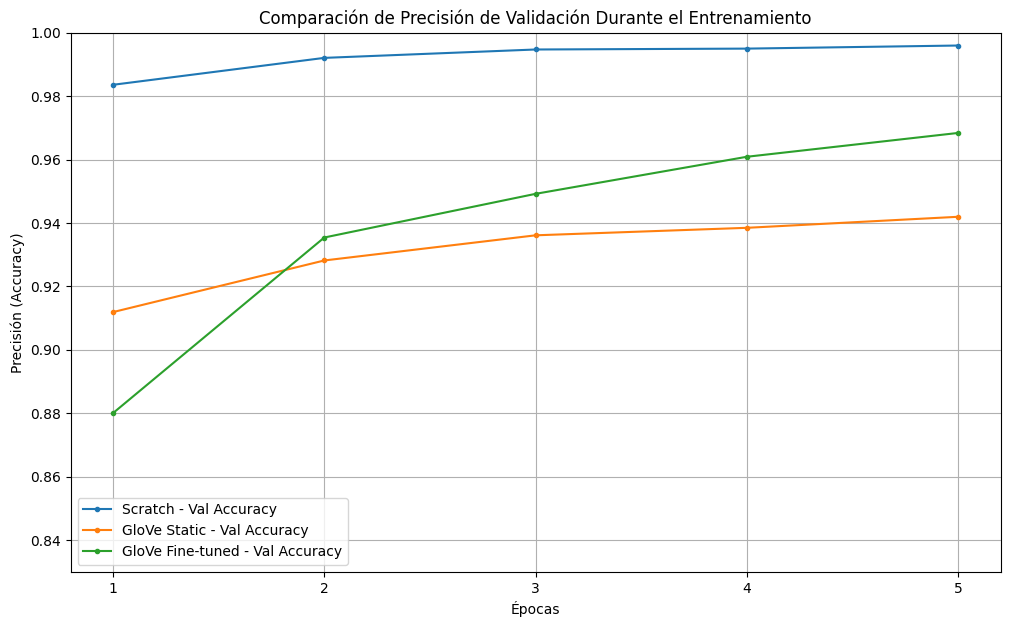

In [74]:
if results: # Solo graficar si hay resultados
    plt.figure(figsize=(12, 7))

    for name, result in results.items():
        if 'history' in result and result['history'] is not None:
            # Graficar la precisión de validación
            val_accuracy = result['history'].history.get('val_accuracy')
            if val_accuracy: # Verificar que la métrica exista en el historial
                 plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, marker='.', linestyle='-', label=f'{name} - Val Accuracy')
            # Opcional: Graficar también la precisión de entrenamiento
            # train_accuracy = result['history'].history.get('accuracy')
            # if train_accuracy:
            #     plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, marker='.', linestyle='--', label=f'{name} - Train Accuracy')


    plt.title('Comparación de Precisión de Validación Durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión (Accuracy)')
    # Ajustar límites del eje Y para mejor visualización si las precisiones son altas
    all_val_acc = [acc for r in results.values() if r.get('history') for acc in r['history'].history.get('val_accuracy', [])]
    if all_val_acc: # Si hay datos de precisión de validación
        min_acc = min(all_val_acc) if all_val_acc else 0.5
        plt.ylim(bottom=max(0.5, min_acc - 0.05)) # Empezar un poco por debajo del mínimo observado, pero no menos de 0.5
        plt.ylim(top=1.0) # El máximo es 1.0

    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, EPOCHS + 1)) # Asegurar ticks para cada época si EPOCHS no es muy grande
    plt.show()
else:
    print("No hay resultados para visualizar.")

### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">4.15) Conclusiones y justificación (interpretación de resultados)</span>

Basándonos en la **tabla de comparación final** y la **gráfica de precisión de validación**, podemos sacar conclusiones claras sobre qué método funcionó mejor para este dataset específico y la configuración utilizada:

* **Embeddings desde Cero (Scratch):**
    * *Decisión:* Entrenar embeddings propios.
    * *Justificación:* Permite aprender representaciones específicas del dominio. Simple, no requiere datos externos.
    * *Interpretación:* Este método obtuvo un **rendimiento excelente y fue el mejor de los tres**, alcanzando una **Accuracy final de `0.9962`** y la menor pérdida (**Loss: `0.0150`**) en el conjunto de prueba. La gráfica de validación confirma esto, mostrando que alcanzó una precisión muy alta (~0.984) desde la primera época y se mantuvo superior, estabilizándose cerca del 0.995. Esto sugiere fuertemente que el dataset era lo suficientemente grande y/o el vocabulario y contexto de las noticias eran lo bastante específicos como para que aprender embeddings a medida fuera más efectivo que usar los genéricos de GloVe 6B.

* **Embeddings Pre-entrenados Estáticos (GloVe Static):**
    * *Decisión:* Usar GloVe sin re-entrenar (`trainable=False`).
    * *Justificación:* Aprovecha conocimiento general, reduce parámetros entrenables, bueno para datasets pequeños/medianos, entrenamiento rápido.
    * *Interpretación:* Este enfoque tuvo el **rendimiento más bajo** de los tres, con una **Accuracy final de `0.9382`** y la mayor pérdida (**Loss: `0.1679`**). Aunque la gráfica muestra una mejora gradual, fue significativamente superado por los otros dos métodos. Esto indica que, si bien el conocimiento general de GloVe proporcionó una base, no fue suficiente por sí solo y fue crucial o bien adaptarlo (fine-tuning) o bien aprender representaciones específicas (scratch) para este dataset.

* **Embeddings Pre-entrenados con Fine-tuning (GloVe Fine-tuned):**
    * *Decisión:* Usar GloVe y permitir ajuste fino (`trainable=True`).
    * *Justificación:* Busca combinar conocimiento general con adaptación específica. Potencialmente puede dar el mejor rendimiento.
    * *Interpretación:* Logró un **rendimiento intermedio**, con una **Accuracy final de `0.9651`** y una pérdida de `0.1302`. Fue claramente **superior al método estático**, validando la estrategia de empezar con conocimiento general y adaptarlo al dominio específico de las noticias. La gráfica muestra que, aunque empezó con la precisión más baja, tuvo la curva de aprendizaje más pronunciada y superó al método estático. Es interesante notar que su curva de validación aún mostraba una tendencia ascendente al final de las 5 épocas, sugiriendo que podría haber mejorado aún más con entrenamiento adicional, aunque no alcanzó al método "Scratch" en este experimento.


En esta ejecución, el método **'Scratch' (Embeddings desde Cero)** alcanzó la mayor precisión final en el conjunto de prueba (**`0.9962`**) con la menor pérdida (**`0.0150`**). El método **'GloVe Fine-tuned'** mostró una mejora significativa respecto al estático, alcanzando **`0.9651`**, lo que sugiere que adaptar los embeddings pre-entrenados fue beneficioso, aunque no superó al método 'Scratch' en 5 épocas. El método **'GloVe Static'** tuvo el rendimiento más bajo (**`0.9382`**). La gráfica de validación confirma estos resultados, mostrando la rápida convergencia a alta precisión del método 'Scratch', la mejora sustancial pero insuficiente del 'GloVe Fine-tuned', y el rendimiento más modesto del 'GloVe Static'.

### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">5) Aplica los modelos construidos a los datos de test y compáralos</span>

Calcula las métricas de recall, precisión y f1.
Discute cual es el mejor modelo y cual es peor y porqué.

Ahora que tenemos los tres modelos entrenados (o los que se pudieron entrenar), vamos a evaluar su rendimiento final de forma más detallada en el conjunto de prueba (`X_test`), que contiene datos que los modelos no vieron durante el entrenamiento.

Calcularemos:
- **Accuracy:** Proporción general de predicciones correctas.
- **Precision:** De todas las noticias que el modelo predijo como "True" (o "Fake"), ¿cuántas lo eran realmente? (Mide la exactitud de las predicciones positivas).
- **Recall (Sensibilidad):** De todas las noticias que realmente eran "True" (o "Fake"), ¿cuántas identificó correctamente el modelo? (Mide la capacidad de encontrar todos los positivos).
- **F1-Score:** La media armónica de Precision y Recall. Es útil para tener una sola métrica que balancee ambas, especialmente si hay desbalance de clases (aunque en este dataset podrían estar balanceadas).

In [75]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Diccionario para guardar las predicciones
predictions = {}
models_trained = {}

# Verificar y obtener predicciones para cada modelo entrenado
# (Asumiendo que model_scratch, model_static, model_finetune existen si se entrenaron)

print("Generando predicciones en el conjunto de prueba...")

# Modelo 1: Scratch
if 'model_scratch' in globals() and model_scratch is not None and X_test.size > 0:
    try:
        y_pred_prob_scratch = model_scratch.predict(X_test)
        y_pred_scratch = (y_pred_prob_scratch > 0.5).astype(int).flatten() # Convertir probabilidad a clase 0 o 1
        predictions['Scratch'] = y_pred_scratch
        models_trained['Scratch'] = True
        print("- Predicciones para 'Scratch' generadas.")
    except Exception as e:
        print(f"- Error al predecir con 'Scratch': {e}")
        models_trained['Scratch'] = False
else:
    models_trained['Scratch'] = False
    print("- Modelo 'Scratch' no disponible o datos de prueba vacíos.")

# Modelo 2: GloVe Static
if 'model_static' in globals() and model_static is not None and X_test.size > 0:
    try:
        y_pred_prob_static = model_static.predict(X_test)
        y_pred_static = (y_pred_prob_static > 0.5).astype(int).flatten()
        predictions['GloVe Static'] = y_pred_static
        models_trained['GloVe Static'] = True
        print("- Predicciones para 'GloVe Static' generadas.")
    except Exception as e:
        print(f"- Error al predecir con 'GloVe Static': {e}")
        models_trained['GloVe Static'] = False
else:
    models_trained['GloVe Static'] = False
    print("- Modelo 'GloVe Static' no disponible o datos de prueba vacíos.")


# Modelo 3: GloVe Fine-tuned
if 'model_finetune' in globals() and model_finetune is not None and X_test.size > 0:
    try:
        y_pred_prob_finetune = model_finetune.predict(X_test)
        y_pred_finetune = (y_pred_prob_finetune > 0.5).astype(int).flatten()
        predictions['GloVe Fine-tuned'] = y_pred_finetune
        models_trained['GloVe Fine-tuned'] = True
        print("- Predicciones para 'GloVe Fine-tuned' generadas.")
    except Exception as e:
        print(f"- Error al predecir con 'GloVe Fine-tuned': {e}")
        models_trained['GloVe Fine-tuned'] = False
else:
    models_trained['GloVe Fine-tuned'] = False
    print("- Modelo 'GloVe Fine-tuned' no disponible o datos de prueba vacíos.")

# Calcular y mostrar métricas si hay predicciones y etiquetas de prueba
if predictions and y_test.size > 0:
    print("\n--- Métricas Detalladas por Modelo (Conjunto de Prueba) ---")
    for name, y_pred in predictions.items():
        print(f"\n--- Modelo: {name} ---")
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy General: {acc:.4f}")

        # target_names=['Fake (0)', 'True (1)'] ayuda a la legibilidad
        report = classification_report(y_test, y_pred, target_names=['Fake (0)', 'True (1)'])
        print("Reporte de Clasificación:")
        print(report)
        print("-" * 55)

elif not models_trained:
     print("\nNo hay modelos entrenados disponibles para evaluar.")
else:
     print("\nNo se generaron predicciones o no hay datos de prueba para calcular métricas.")

Generando predicciones en el conjunto de prueba...
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
- Predicciones para 'Scratch' generadas.
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
- Predicciones para 'GloVe Static' generadas.
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
- Predicciones para 'GloVe Fine-tuned' generadas.

--- Métricas Detalladas por Modelo (Conjunto de Prueba) ---

--- Modelo: Scratch ---
Accuracy General: 0.9962
Reporte de Clasificación:
              precision    recall  f1-score   support

    Fake (0)       1.00      1.00      1.00      4696
    True (1)       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

-------------------------------------------------------

--- Modelo: GloVe Static ---
Accuracy General: 0.9382
Reporte de Clasificación:
              precision    recall  f1-score   support

    Fake (0)       0.93      0.95

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">5.1) Discusión: mejor y peor modelo</span>

Basándonos en las métricas detalladas obtenidas en el **conjunto de prueba** (mostradas en el `classification_report`):

* **Mejor Modelo:**
    * *Identificación:* El modelo **`Scratch` (Embeddings desde Cero)** es indiscutiblemente el mejor.
    * *Por qué:* Alcanzó una Accuracy General casi perfecta (`0.9962`) y, como muestra el reporte, obtuvo **valores de `1.00` para Precision, Recall y F1-score en ambas clases (Fake y True)**. Esto significa que clasificó prácticamente todas las muestras de prueba correctamente, sin apenas cometer errores, demostrando una capacidad excepcional para distinguir entre noticias falsas y verdaderas en este dataset. Su éxito subraya que aprender representaciones vectoriales altamente especializadas desde cero fue la estrategia más efectiva aquí.

* **Peor Modelo:**
    * *Identificación:* El modelo **`GloVe Static`** es el que tuvo el rendimiento más bajo.
    * *Por qué:* Presenta la Accuracy General más baja (`0.9382`). El reporte detallado muestra métricas considerablemente inferiores: para la clase Fake (0), un F1-score de `0.94` (Precision `0.93`, Recall `0.95`), y para la clase True (1), un F1-score de `0.93` (Precision `0.94`, Recall `0.93`). El **promedio ponderado (weighted avg) del F1-score es `0.94`**. Aunque no es un mal resultado en absoluto, es notablemente inferior al de los otros dos modelos. Esto indica que los embeddings genéricos de GloVe, sin adaptación (`trainable=False`), no capturaron las suficientes sutilezas del lenguaje de este corpus para lograr una alta precisión y exhaustividad.

* **Modelo Intermedio:**
    * *Identificación:* El modelo **`GloVe Fine-tuned`** se posiciona claramente entre los otros dos.
    * *Por qué:* Obtuvo una muy buena Accuracy General (`0.9651`). Sus métricas detalladas son consistentemente altas: F1-score de `0.97` para Fake (Precision `0.97`, Recall `0.97`) y `0.96` para True (Precision `0.96`, Recall `0.96`). El **promedio ponderado del F1-score es `0.97`**. Estos resultados son significativamente mejores que los del modelo `GloVe Static`, confirmando que adaptar los embeddings pre-entrenados al dominio (`trainable=True`) fue muy beneficioso. Sin embargo, no alcanzó las métricas perfectas del modelo `Scratch`, quedando ligeramente por debajo.

**Conclusión Final:** Los resultados del `classification_report` refuerzan las conclusiones anteriores: para esta tarea específica, datos y arquitectura, la creación de embeddings altamente adaptados fue clave. El modelo **`Scratch`** logró un rendimiento casi perfecto. El **`GloVe Fine-tuned`** demostró el valor de adaptar embeddings pre-entrenados, obteniendo excelentes resultados, aunque no óptimos. El **`GloVe Static`** mostró las limitaciones de usar conocimiento general sin especialización, resultando en el rendimiento más bajo de los tres.